In [57]:
#Tabular Data Model Fitting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import partial, update_wrapper
from collections import defaultdict
from scipy.stats import multivariate_normal, norm, uniform

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [58]:
#Exploring the dataset


train = pd.read_csv('train_model_fitting.csv')
test = pd.read_csv('test_model_fitting.csv')
df = pd.concat([train, test], axis=0, sort=True)


In [75]:
df.shape


(85462, 64)

In [133]:
train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000,75757.000,73920.000,49048.000,75757.000,75757.000,75757.000,75757.000,75757.000,75757.000,...,75757.000,75757.000,75757.000,75757.000,34675.000,33946.000,34675.000,29961.000,75757.000,75757.000
mean,4.368,165983.866,1952.307,61.049,39.506,11.432,34.310,59.055,11.721,35.527,...,82.710,14.059,0.280,0.002,66.553,62.780,4.191,109.142,82.585,37878.000
std,1.471,246875.791,37.054,28.664,60.657,9.381,6.996,5.355,12.577,8.867,...,25.283,10.944,2.252,0.142,131.148,130.308,6.459,50.700,58.255,21869.307
min,1.000,943.000,0.000,0.000,-6.400,-19.000,10.806,42.000,-13.000,13.250,...,0.000,0.000,0.000,0.000,1.000,1.000,1.000,12.000,1.001,0.000
25%,3.000,62379.000,1927.000,40.000,11.900,6.000,29.828,56.000,2.000,31.625,...,72.000,6.000,0.000,0.000,1.000,1.000,1.000,88.000,54.529,18939.000
50%,5.000,91367.000,1951.000,67.000,25.000,11.000,34.452,59.000,9.000,34.107,...,84.000,12.000,0.000,0.000,1.000,1.000,1.000,104.000,75.294,37878.000
75%,6.000,166000.000,1977.000,85.000,42.700,13.000,37.323,62.000,20.000,40.879,...,97.000,17.000,0.000,0.000,1.000,1.000,1.000,131.000,97.278,56817.000
max,6.000,6385382.000,2015.000,100.000,1924.500,49.000,64.758,91.000,48.000,65.107,...,260.000,185.000,119.000,16.000,360.000,360.000,23.300,311.000,997.866,75756.000


In [136]:
train.nunique()

Year_Factor                      6
State_Factor                     7
building_class                   2
facility_type                   60
floor_area                   20433
                             ...  
direction_peak_wind_speed        8
max_wind_speed                  16
days_with_fog                   42
site_eui                     61080
id                           75757
Length: 64, dtype: int64

In [161]:
train.isnull().sum().sum()

198317

In [162]:
train.dropna(inplace=True)

In [163]:
train.isnull().sum().sum()

0

In [175]:
train.head()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
404,2,34173.000,1913.000,100.000,2.400,27,48.952,69,33,51.655,...,113,35,1,0,1.000,1.000,1.000,88.000,18.674,404
405,2,46800.000,1914.000,61.000,2.400,27,48.952,69,33,51.655,...,113,35,1,0,1.000,1.000,1.000,88.000,91.141,405
406,2,162214.000,1924.000,35.000,2.400,27,48.952,69,33,51.655,...,113,35,1,0,1.000,1.000,1.000,88.000,106.120,406
407,2,168000.000,1927.000,74.000,2.400,27,48.952,69,33,51.655,...,113,35,1,0,1.000,1.000,1.000,88.000,65.825,407
411,2,99000.000,1929.000,98.000,2.400,27,48.952,69,33,51.655,...,113,35,1,0,1.000,1.000,1.000,88.000,54.412,411


In [176]:
train.corr()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
Year_Factor,1.000,-0.183,0.110,-0.064,-0.005,0.014,-0.144,-0.111,-0.566,-0.339,...,0.200,-0.201,-0.541,NaN,0.316,0.315,0.310,0.690,-0.085,0.757
floor_area,-0.183,1.000,0.078,0.053,0.077,-0.034,0.008,0.027,0.068,0.060,...,-0.009,0.111,0.094,NaN,-0.081,-0.081,-0.083,-0.125,0.045,-0.164
year_built,0.110,0.078,1.000,-0.103,-0.002,0.040,0.029,0.013,0.014,0.054,...,-0.087,-0.027,-0.054,NaN,-0.054,-0.054,-0.053,0.091,0.012,0.086
energy_star_rating,-0.064,0.053,-0.103,1.000,-0.003,0.095,0.105,0.037,0.087,0.087,...,-0.010,0.070,0.068,NaN,-0.035,-0.036,-0.032,-0.001,-0.476,-0.078
ELEVATION,-0.005,0.077,-0.002,-0.003,1.000,-0.293,-0.263,-0.557,-0.090,-0.243,...,-0.243,-0.071,-0.017,NaN,0.141,0.142,0.136,0.332,-0.001,-0.267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
direction_peak_wind_speed,0.315,-0.081,-0.054,-0.036,0.142,-0.270,-0.378,-0.294,-0.507,-0.802,...,0.496,-0.199,-0.224,NaN,1.000,1.000,0.991,0.367,0.022,0.273
max_wind_speed,0.310,-0.083,-0.053,-0.032,0.136,-0.272,-0.376,-0.292,-0.503,-0.793,...,0.486,-0.196,-0.220,NaN,0.989,0.991,1.000,0.388,0.023,0.277
days_with_fog,0.690,-0.125,0.091,-0.001,0.332,0.362,0.204,-0.114,-0.069,-0.136,...,-0.123,-0.172,-0.413,NaN,0.363,0.367,0.388,1.000,-0.132,0.500
site_eui,-0.085,0.045,0.012,-0.476,-0.001,-0.140,-0.118,-0.056,-0.074,-0.080,...,0.045,-0.018,0.020,NaN,0.022,0.022,0.023,-0.132,1.000,-0.060


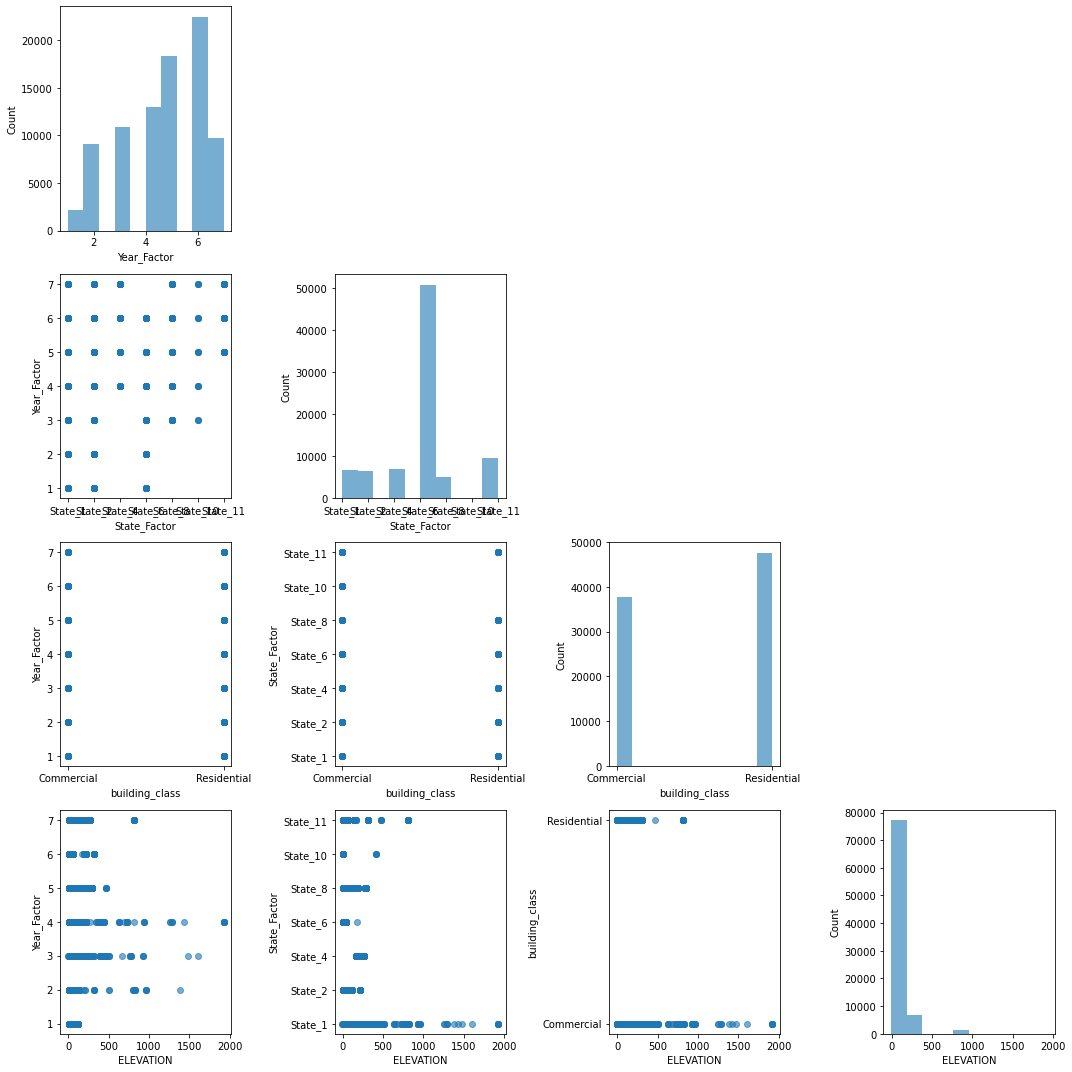

In [167]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols=['Year_Factor', 'State_Factor', 'building_class', 'ELEVATION']
scatterplotmatrix(df[cols].values, figsize=(15,15), names=cols, alpha=0.6)
plt.tight_layout()
plt.show()

In [177]:
X=df1.iloc[:, :-1]
y= df1.iloc[:, -1]

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [179]:
X_train.shape

(64096, 63)

In [180]:
y_train.shape

(64096,)

In [181]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0)



In [182]:
lasso.fit(X_train, y_train)

ValueError: could not convert string to float: 'State_11'

In [134]:
df.describe()

,ELEVATION,Year_Factor,april_avg_temp,april_max_temp,april_min_temp,august_avg_temp,august_max_temp,august_min_temp,avg_temp,cooling_degree_days,...,october_max_temp,october_min_temp,precipitation_inches,september_avg_temp,september_max_temp,september_min_temp,site_eui,snowdepth_inches,snowfall_inches,year_built
count,85462.000,85462.000,85462.000,85462.000,85462.000,85462.000,85462.000,85462.000,85462.000,85462.000,...,85462.000,85462.000,85462.000,85462.000,85462.000,85462.000,75757.000,85462.000,85462.000,83533.000
mean,58.326,4.667,53.833,82.177,32.341,74.792,92.342,57.792,55.953,1149.004,...,81.057,37.980,42.335,69.297,92.277,50.246,82.585,148.103,26.797,1953.563
std,118.277,1.618,2.744,5.146,5.622,4.052,3.997,4.890,2.492,425.743,...,5.696,5.086,10.254,3.583,4.940,4.654,58.255,171.896,18.265,37.667
min,-6.400,1.000,40.280,61.000,15.000,56.694,66.000,31.000,44.512,0.000,...,59.000,18.000,0.000,53.600,64.000,26.000,1.001,0.000,0.000,0.000
25%,11.900,3.000,52.333,80.000,28.000,71.806,90.000,54.000,54.501,986.000,...,78.000,35.000,40.970,67.867,91.000,47.000,54.529,10.000,9.600,1927.000
50%,25.600,5.000,53.333,82.000,32.000,74.774,91.000,60.000,56.519,1272.000,...,81.000,38.000,42.170,69.733,92.000,52.000,75.294,64.000,29.600,1954.000
75%,42.700,6.000,54.767,86.000,37.000,78.968,95.000,61.000,57.216,1489.000,...,85.000,40.000,46.320,71.800,96.000,54.000,97.278,377.000,44.700,1981.000
max,1924.500,7.000,74.500,104.000,52.000,94.903,116.000,77.000,77.245,4948.000,...,108.000,61.000,112.920,90.117,111.000,65.000,997.866,1292.000,127.300,2016.000


In [159]:
y_pred=lasso.predict(X_test)

NotFittedError: This Lasso instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [160]:
y_pred

NameError: name 'y_pred' is not defined

In [ ]:
print("Slope: %.2f" % lasso_coef_[0])

In [ ]:
print("Intercept: %.2f" % lasso_intercept)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print("Rsquared: %.2f" % lasso.score(X_test, y_test))

random forest

In [ ]:
X=df1.iloc[:, :-1]
y= df1.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=10)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)


In [ ]:
y_pred=lasso.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

Decision Tree Regression Model

In [ ]:
X=df1.iloc[:, :-1]
y= df1.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=100)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.ensemble import DecisionTreeRegressor
reg=DecisionTreeRegressor(criterion="mse",
                         max_depth=10,
                         min_samples_split=10,
                         random_state=5)

reg.fit(X_train, y_train)



In [ ]:
y_pred=lasso.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg, X_train, y_train, cv=10)



In [ ]:
ridge regression model

In [ ]:
X=df1.iloc[:, :-1]
y= df1.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=100)

In [ ]:
from sklearn.ensemble import Ridge
ridge=Ridge(alpha=1.0)

ridge.fit(X_train, y_train)

In [ ]:
y_pred=lasso.predict(X_test)

In [ ]:
y_pred

In [ ]:
print("Slope: %.2f" % ridge_coef_[0])

In [ ]:
print("Intercept: %.2f" % lasso_intercept)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print("Rsquared: %.2f" % ridge.score(X_test, y_test))

In [80]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.000,1942.000,11.000,2.400,36,50.500,...,14,0,0,0,1.000,1.000,1.000,NaN,248.683,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.000,1955.000,45.000,1.800,36,50.500,...,14,0,0,0,1.000,NaN,1.000,12.000,26.500,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.000,1951.000,97.000,1.800,36,50.500,...,14,0,0,0,1.000,NaN,1.000,12.000,24.694,2
3,1,State_1,Commercial,Education_Other_classroom,55325.000,1980.000,46.000,1.800,36,50.500,...,14,0,0,0,1.000,NaN,1.000,12.000,48.407,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.000,1985.000,100.000,2.400,36,50.500,...,14,0,0,0,1.000,1.000,1.000,NaN,3.899,4


In [87]:
train_data=train.drop(['State_Factor', 'building_class', 'facility_type'], axis=1)

In [91]:
test_data=train.drop(['State_Factor', 'building_class', 'facility_type'], axis=1)

Visualizations 

<AxesSubplot:xlabel='id', ylabel='floor_area'>

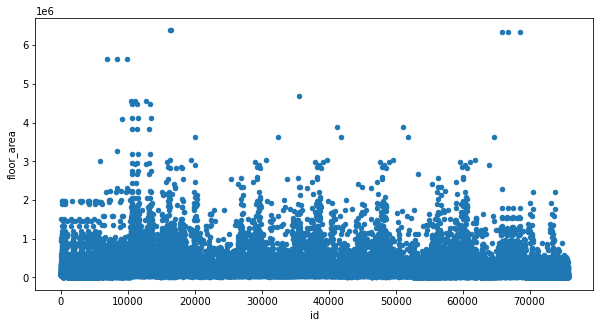

In [114]:
train_data.plot.scatter('id', 'floor_area', figsize=(10,5))

<AxesSubplot:xlabel='year_built', ylabel='building_class'>

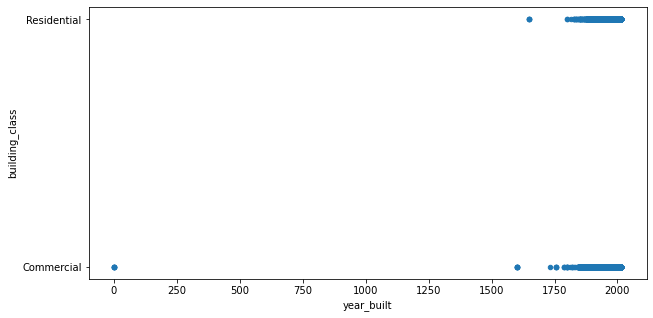

In [113]:
train_data.plot.scatter('year_built', 'building_class', figsize=(10,5))

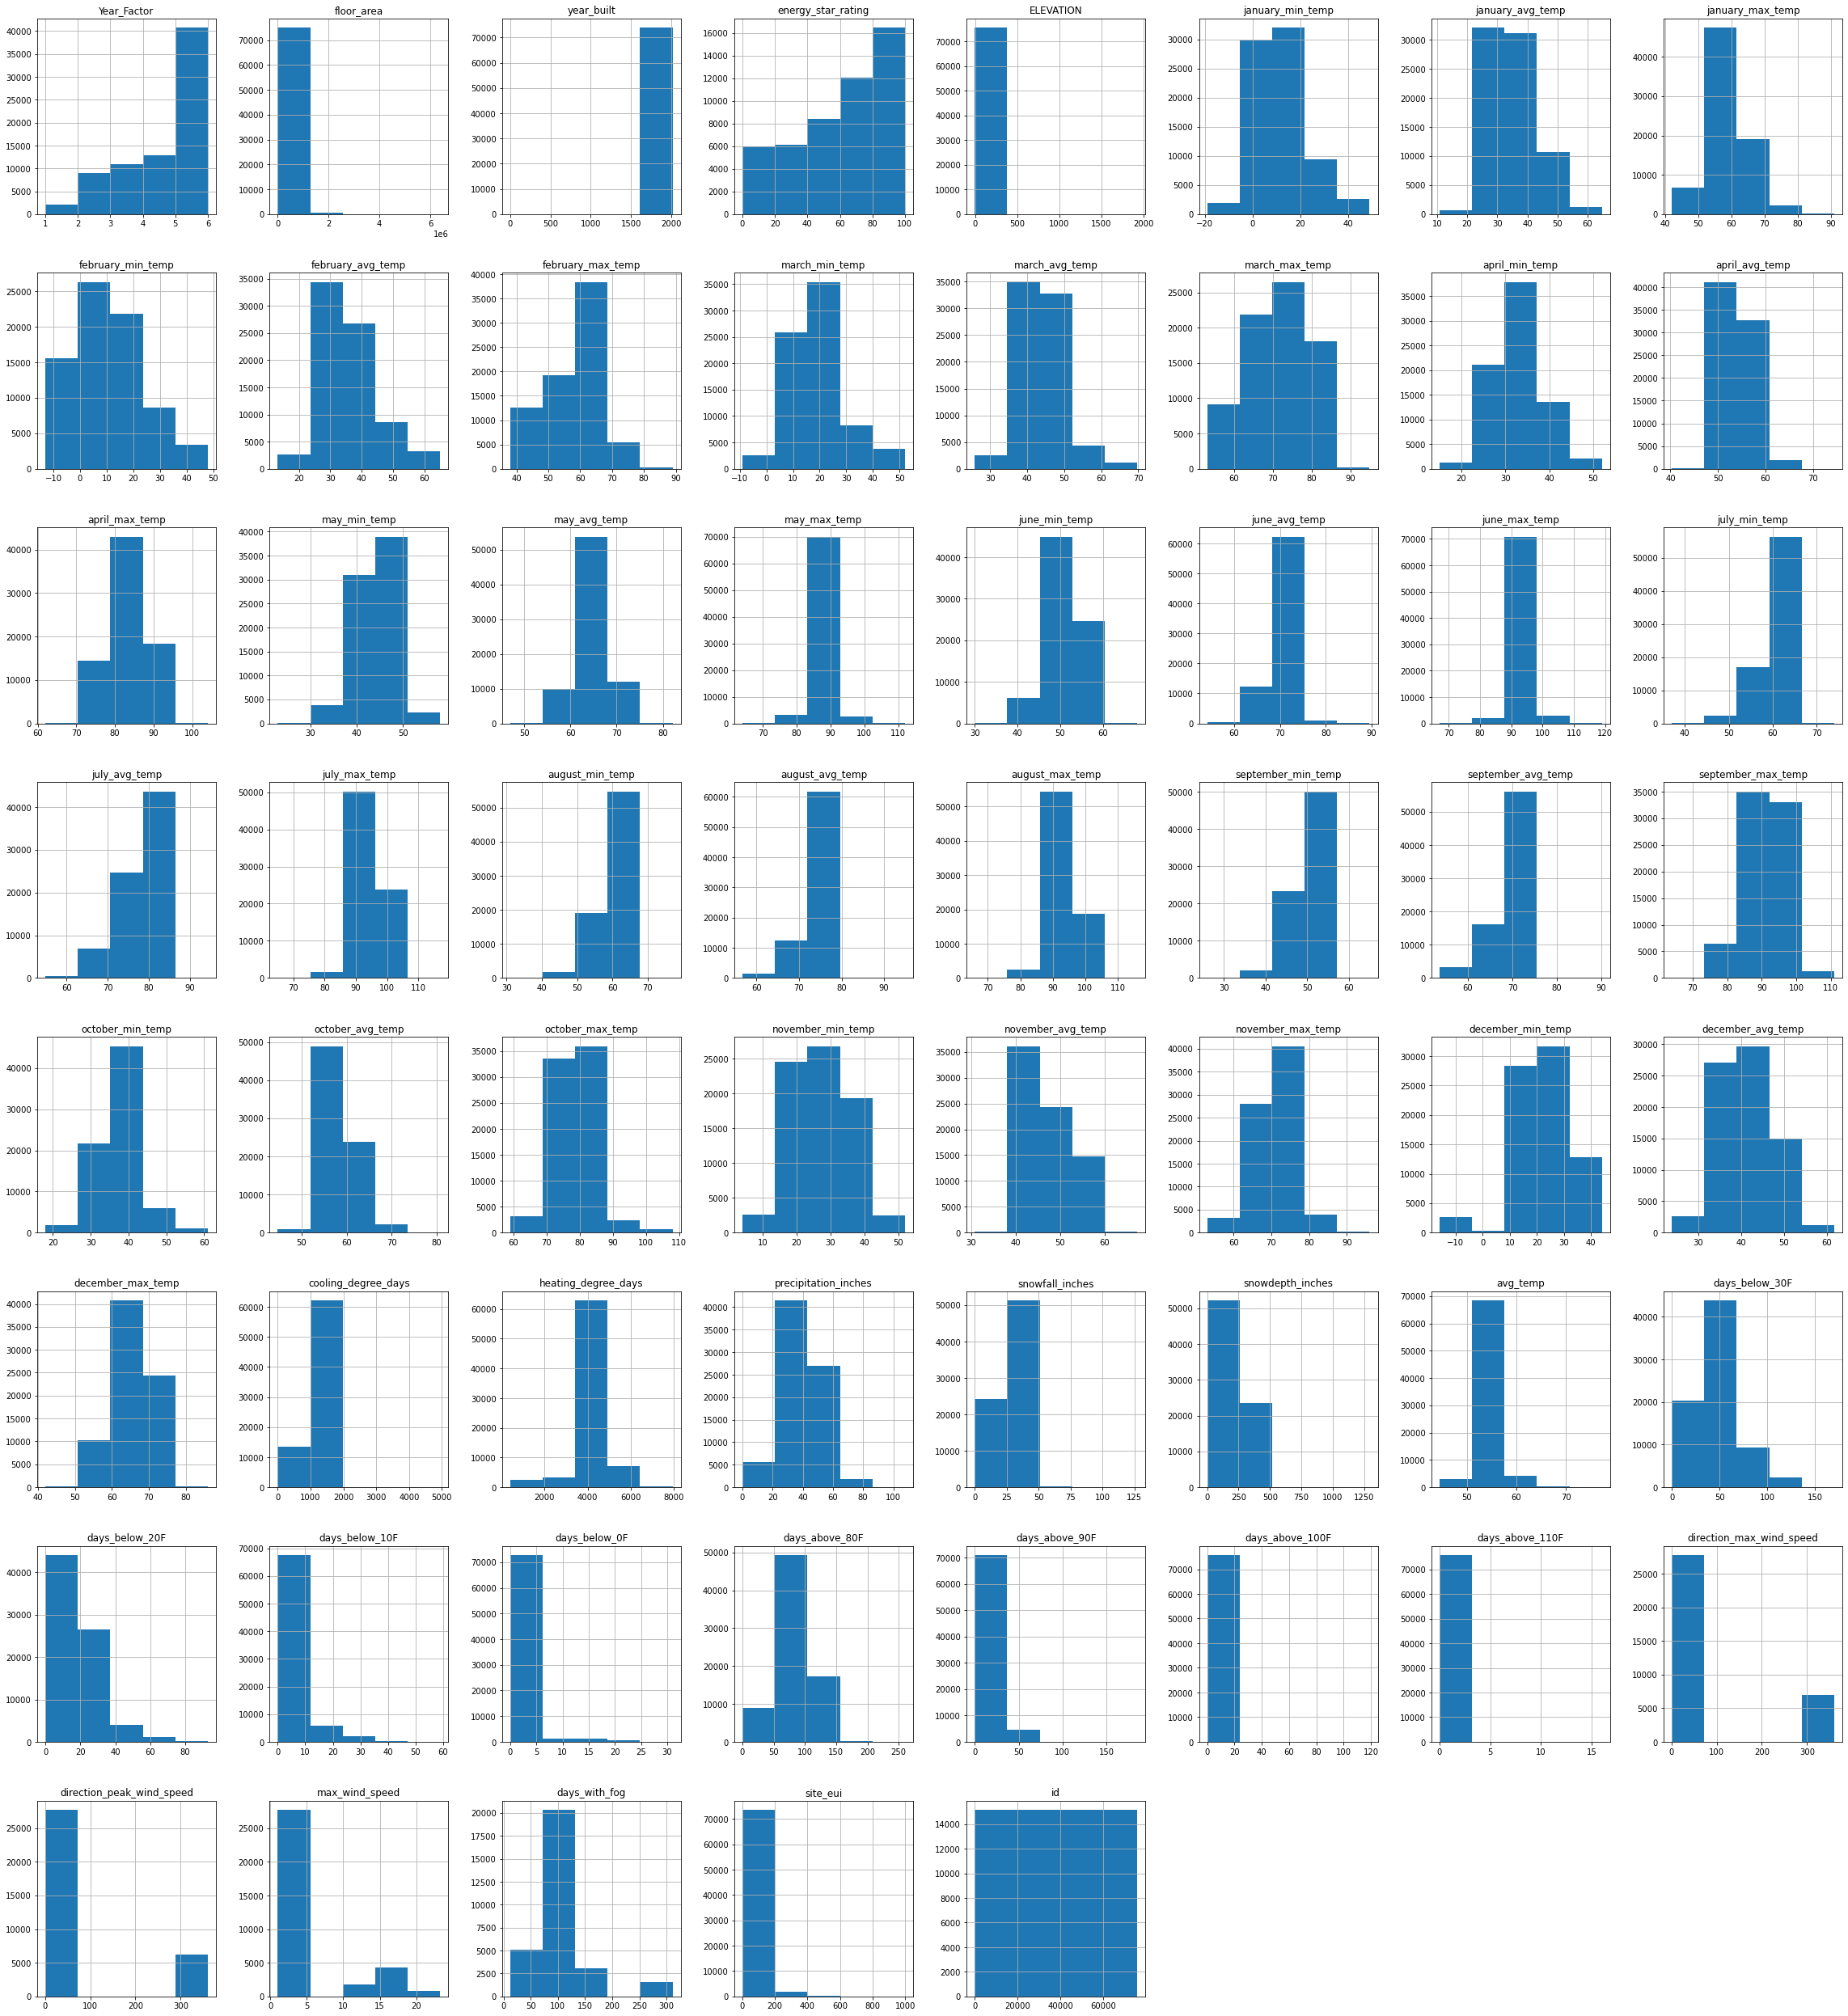

In [120]:
hist = train_data.hist(bins=5, figsize=(40,45))

<AxesSubplot:xlabel='year_built'>

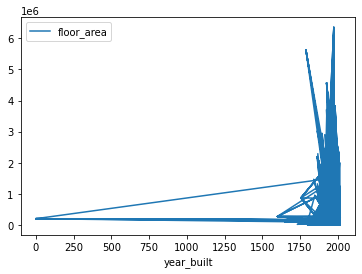

In [127]:
df.plot(x="year_built", y="floor_area") 

<AxesSubplot:xlabel='building_class', ylabel='facility_type'>

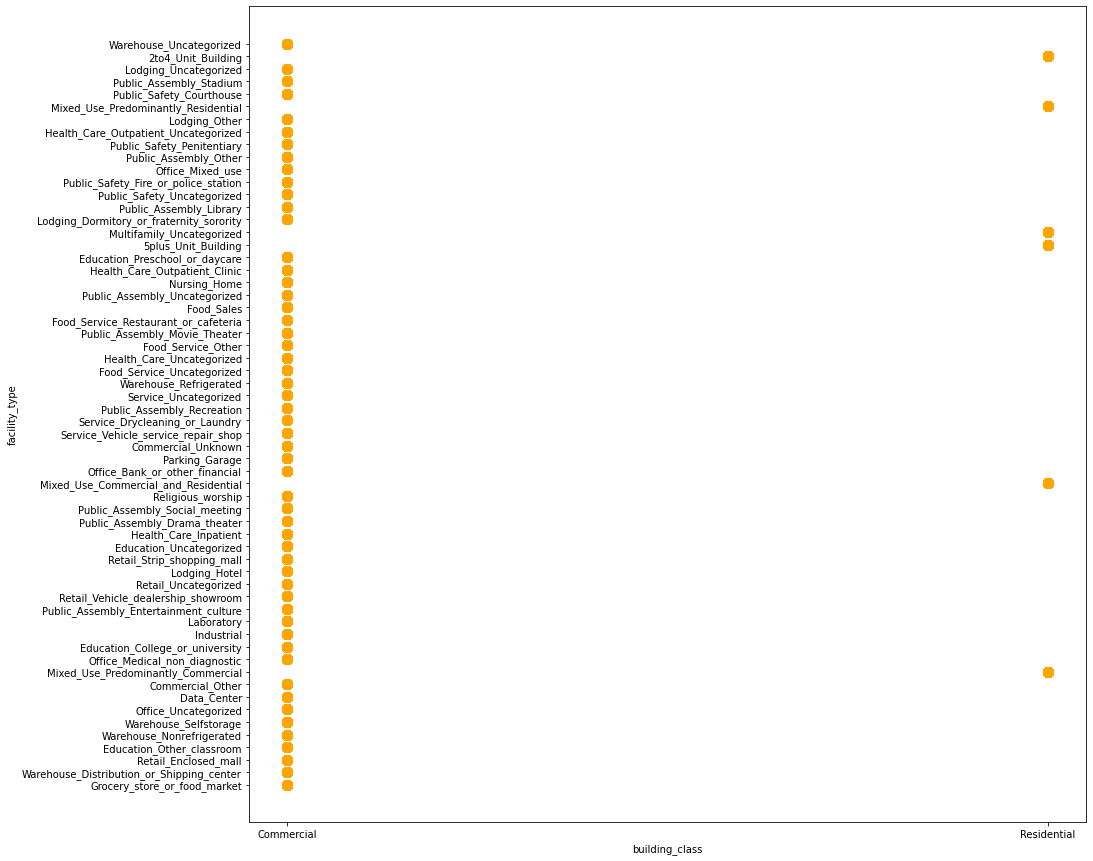

In [132]:
ax=df.plot.scatter(x="year_built", y="floor_area", color="red", marker="*", s=100)
df.plot.scatter(x="building_class", y="facility_type", color="orange", s=100, ax=ax, figsize=(15,15))

In [147]:
train_data.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

standardized the data 

regression 

the muscle of interpreting the coefficients or saying hey I learned about X y&z techniques for selecting the best model

correlation coefficient.
00:18:27
Let me look at you know the magnitude, let me look at you know what if I standardize it, what does the model look like we don't standardize that, how does the model look like, what are the other model model adequacy checks beyond accuracy, can I do to roc curve, can I do you know that.

Precision recall metrics

convincing yourself that the model that you're building is sufficient or adequate for the data.

build a model.

and generate the prediction on the test data set and uploaded on the site and they have scripts that actually once you provide the predictive values, it will calculate the accuracy metric and.

so I will be more grading you on the process what models, did you choose how did you compare.

What aspects of the models, did you actually look into and so on, right and what interpretation you drew away like you drew from that process so.

[From Ryan] Run test.csv through your model.predict() and that will return an array of predictions. Format those predictions into a data frame and then go to the Kaggle link and submit those predictions

https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py

feature selection

Okay, so few observation one, a lot of you said decision tree random forest every booth.

do model tuning

do feature engineering: combine feature to new feature, pca to combine temprature, 

summarize implications of the model: what you find out, business implications, what problem to solve you try

include references 3 